**CMPE 460 - Deep Learning** \
**Term Project - Heart Disease** \
*Bükre Yağmur Türkoğlu - 119200054* \
*Mert Şen - 119200031* \
*Süleyman Mehmet Güneş - 119200077*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the Heart Disease dataset
heart_data = pd.read_csv('/content/sample_data/myHearth.csv')


In [ ]:
# First 5 row of heart_data set
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [73]:
# Last 5 rows of our data
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Split the data into features (X) and target variable (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Original model
model_1 = Sequential()
model_1.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(units=1, activation='sigmoid'))
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=55, batch_size=10, validation_split=0.2)

Epoch 1/55
66/66 [==============================] - 1s 8ms/step - loss: 0.6903 - accuracy: 0.5244 - val_loss: 0.6408 - val_accuracy: 0.5732
Epoch 2/55
66/66 [==============================] - 0s 4ms/step - loss: 0.5766 - accuracy: 0.6540 - val_loss: 0.5647 - val_accuracy: 0.6829
Epoch 3/55
66/66 [==============================] - 0s 4ms/step - loss: 0.4987 - accuracy: 0.7774 - val_loss: 0.5112 - val_accuracy: 0.7744
Epoch 4/55
66/66 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.8262 - val_loss: 0.4772 - val_accuracy: 0.8049
Epoch 5/55
66/66 [==============================] - 0s 6ms/step - loss: 0.4082 - accuracy: 0.8338 - val_loss: 0.4591 - val_accuracy: 0.7927
Epoch 6/55
66/66 [==============================] - 0s 6ms/step - loss: 0.3831 - accuracy: 0.8369 - val_loss: 0.4469 - val_accuracy: 0.7866
Epoch 7/55
66/66 [==============================] - 0s 5ms/step - loss: 0.3652 - accuracy: 0.8445 - val_loss: 0.4396 - val_accuracy: 0.8049
Epoch 8/55
66/66 [==

In [ ]:
# Model 2: Second model with different hyperparameters
model_2 = Sequential()
model_2.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))  # Adjust hyperparameters
model_2.add(Dense(units=1, activation='sigmoid'))
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train, epochs=55, batch_size=10, validation_split=0.2)

Epoch 1/55
66/66 [==============================] - 1s 6ms/step - loss: 0.6724 - accuracy: 0.6021 - val_loss: 0.6198 - val_accuracy: 0.6829
Epoch 2/55
66/66 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7942 - val_loss: 0.5425 - val_accuracy: 0.7317
Epoch 3/55
66/66 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8293 - val_loss: 0.4997 - val_accuracy: 0.7683
Epoch 4/55
66/66 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8445 - val_loss: 0.4770 - val_accuracy: 0.7866
Epoch 5/55
66/66 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8567 - val_loss: 0.4641 - val_accuracy: 0.7988
Epoch 6/55
66/66 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8628 - val_loss: 0.4559 - val_accuracy: 0.7988
Epoch 7/55
66/66 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8720 - val_loss: 0.4506 - val_accuracy: 0.8049
Epoch 8/55
66/66 [==

In [ ]:
# Model 3: Third model with different architecture
model_3 = Sequential()
model_3.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))  # Adjust architecture
model_3.add(Dense(units=1, activation='sigmoid'))
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=55, batch_size=10, validation_split=0.2)

Epoch 1/55
66/66 [==============================] - 1s 5ms/step - loss: 0.6319 - accuracy: 0.6479 - val_loss: 0.5647 - val_accuracy: 0.6951
Epoch 2/55
66/66 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8186 - val_loss: 0.4944 - val_accuracy: 0.7500
Epoch 3/55
66/66 [==============================] - 0s 3ms/step - loss: 0.3790 - accuracy: 0.8430 - val_loss: 0.4616 - val_accuracy: 0.7866
Epoch 4/55
66/66 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8643 - val_loss: 0.4440 - val_accuracy: 0.8171
Epoch 5/55
66/66 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8841 - val_loss: 0.4324 - val_accuracy: 0.8171
Epoch 6/55
66/66 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.8857 - val_loss: 0.4281 - val_accuracy: 0.8110
Epoch 7/55
66/66 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8963 - val_loss: 0.4197 - val_accuracy: 0.8232
Epoch 8/55
66/66 [==

7/7 [==============================] - 0s 3ms/step
Model 1 Results:
Accuracy: 0.80
F1 Score: 0.81
Confusion Matrix:
[[75 27]
 [14 89]]
7/7 [==============================] - 0s 4ms/step
Model 2 Results:
Accuracy: 0.83
F1 Score: 0.84
Confusion Matrix:
[[81 21]
 [14 89]]
7/7 [==============================] - 0s 4ms/step
Model 3 Results:
Accuracy: 0.87
F1 Score: 0.88
Confusion Matrix:
[[86 16]
 [10 93]]


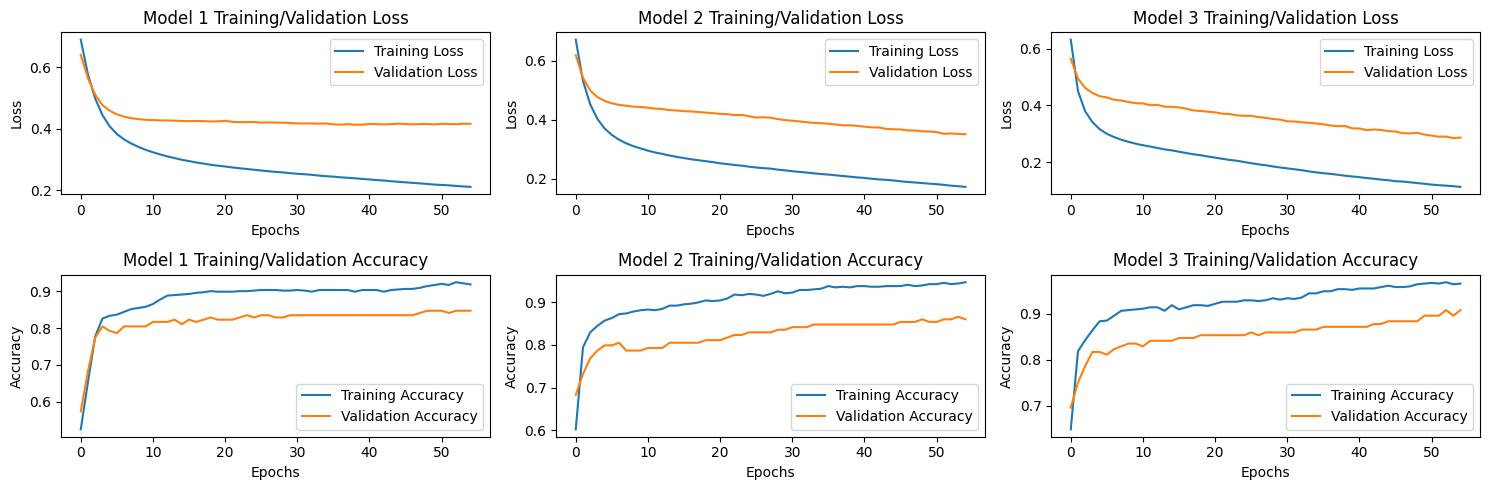

<Figure size 640x480 with 0 Axes>

In [ ]:
# Evaluate models on the test set
models = [model_1, model_2, model_3]
histories = [history_1, history_2, history_3]

for i, (model, history) in enumerate(zip(models, histories), start=1):
    # Evaluate the model on the test set
    y_pred_probs = model.predict(X_test)
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f'Model {i} Results:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

# Plot training/validation loss and accuracy graphs in a single row
plt.figure(figsize=(15, 5))

# Plot training/validation loss graphs
for i, (model, history) in enumerate(zip(models, histories), start=1):
    plt.subplot(2, len(models), i)  # İlk satır: Loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} Training/Validation Loss')
    plt.legend()

# Plot training/validation accuracy graphs
for i, (model, history) in enumerate(zip(models, histories), start=1):
    plt.subplot(2, len(models), i + len(models))  # İkinci satır: Accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} Training/Validation Accuracy')
    plt.legend()

plt.tight_layout()  # Grafiklerin daha iyi görüntülenmesi için
plt.show()


plt.tight_layout()
plt.show()



In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

7/7 [==============================] - 0s 7ms/step


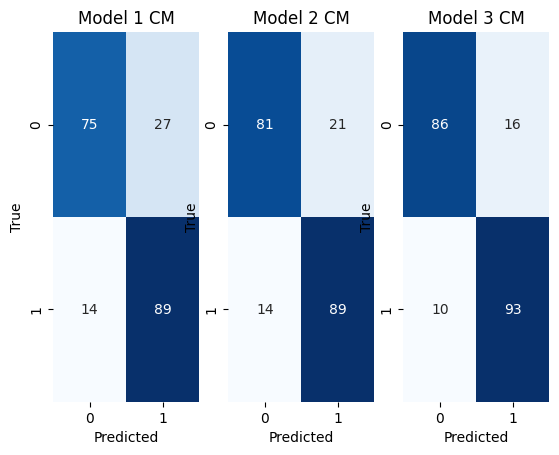

In [78]:
for i, (model, history) in enumerate(zip(models, histories), start=1):
    # Calculate confusion matrix
    y_pred_probs = model.predict(X_test)
    y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.subplot(1, len(models), i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Model {i} CM')